In [37]:
# -*- coding:utf-8 -*-
# 2020 IT 서비스 신기술 실습
# time series
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from google.colab import drive
drive.mount('/content/gdrive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 분할 함수
def split(data):
    train_size = int(len(data)*0.6)
    val_size = int(len(data)*0.8)
    data_train = data[:train_size]
    data_val = data[train_size:val_size]
    data_test = data[val_size:]
    return data_train, data_val, data_test

# 데이터 정규화 함수
def normalization(data_train, data_val, data_test):
    scaler = MinMaxScaler() #StandardScaler
    scaler.fit(data_train)
    n_data_train = scaler.transform(data_train)
    n_data_val = scaler.transform(data_val)
    n_data_test = scaler.transform(data_test)
    return n_data_train, n_data_val, n_data_test

# 모델 설계 함수
def build_reg_model(x_train):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    return model

# 모델 학습 함수
def learning(x_train, y_train, x_val, y_val):
    callbacks_list = [
            EarlyStopping(monitor='val_loss', patience=5,),
            ModelCheckpoint(filepath='best_model.h5', monitor='val_loss',
            save_best_only=True, )]
    hist = model.fit(x_train, y_train, epochs=1000, batch_size = 16,
                    callbacks=callbacks_list, validation_data=(x_val,y_val))
    return hist

# 학습 시각화 함수
def learning_graph(hist):
    fig, loss_ax = plt.subplots()
    loss_ax.plot(hist.history['loss'],'g', label='train loss')
    loss_ax.plot(hist.history['val_loss'],'b', label='val loss')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    loss_ax.legend(loc='upper left')
    plt.show()

# 시계열 데이터 lag, time_step 고려 x, y 데이터로 변환
def seq_to_data(data, lag, time_step):
    x_data, y_data = [], []
    for i in range(len(data) - time_step):
        x = data[i:(i + time_step)]
        y = data[i + time_step]
        x_data.append(x)
        y_data.append(y)
    x_data = np.array(x_data[:-lag])
    y_data = np.array(y_data[lag:])
    return x_data, y_data

def convert_unixtime(data_time):
    import datetime
    unixtime = datetime.datetime.strptime(data_time,
                                          '%Y-%m-%d').timestamp()
    unixtime = int(unixtime)
    unixtime = str(unixtime)
    return unixtime

def get_nasdaq_daily(start, end):
    # YYYY-MM-DD
    unix_start = convert_unixtime(start)
    unix_end = convert_unixtime(end)
    url = 'https://query1.finance.yahoo.com/v7/finance/download/%5EIXIC?period1='+unix_start+'&period2='+unix_end+'&interval=1d&events=history&includeAdjustedClose=true'
    dataset = pd.read_csv(url)
    return dataset

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


count      234.000000
mean     10001.896017
std       1343.702741
min       6860.669922
25%       9076.649903
50%       9933.899903
75%      11126.680420
max      12377.179688
Name: Close, dtype: float64
Epoch 1/1000
9/9 [==============================] - 0s 15ms/step - loss: 84035168.0000 - mse: 84035168.0000 - val_loss: 123034080.0000 - val_mse: 123034080.0000
Epoch 2/1000
9/9 [==============================] - 0s 5ms/step - loss: 84030368.0000 - mse: 84030368.0000 - val_loss: 123025400.0000 - val_mse: 123025400.0000
Epoch 3/1000
9/9 [==============================] - 0s 4ms/step - loss: 84026824.0000 - mse: 84026824.0000 - val_loss: 123018920.0000 - val_mse: 123018920.0000
Epoch 4/1000
9/9 [==============================] - 0s 5ms/step - loss: 84023456.0000 - mse: 84023456.0000 - val_loss: 123011752.0000 - val_mse: 123011752.0000
Epoch 5/1000
9/9 [==============================] - 0s 5ms/step - loss: 84019176.0000 - mse: 84019176.0000 - val_loss: 123002568.0000 - val_mse: 123002568.

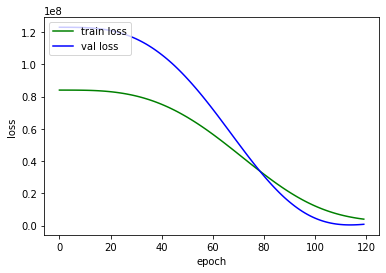

RMSE of train: 1985.678
RMSE of val  : 869.640
RMSE of test : 1177.722


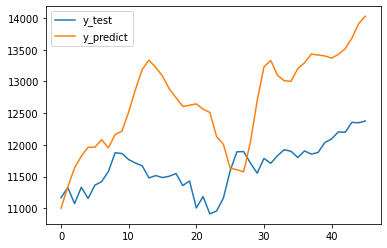

          y_test     y_predict
0   11167.509766  11001.719727
1   11326.509766  11337.682617
2   11075.019531  11636.431641
3   11332.490234  11821.604492
4   11154.599609  11963.303711
5   11364.599609  11963.110352
6   11420.980469  12082.276367
7   11579.940430  11952.920898
8   11876.259766  12163.898438
9   11863.900391  12216.146484
10  11768.730469  12519.723633
11  11713.870117  12874.250977
12  11671.559570  13189.606445
13  11478.879883  13336.051758
14  11516.490234  13223.336914
15  11484.690430  13085.699219
16  11506.009766  12884.053711
17  11548.280273  12744.512695
18  11358.940430  12605.872070
19  11431.349609  12626.266602
20  11004.870117  12646.317383
21  11185.589844  12562.247070
22  10911.589844  12511.575195
23  10957.610352  12130.153320
24  11160.570313  12011.116211
25  11590.780273  11632.938477
26  11890.929688  11608.250977
27  11895.230469  11575.333008
28  11713.780273  12044.124023
29  11553.860352  12698.457031
30  11786.429688  13229.227539
31  1170

In [38]:
# 함수 활용 실행
# 랜덤시드 고정
np.random.seed(5)

# 데이터 로드
dataset = get_nasdaq_daily('2020-01-01','2020-12-04')
# dataset = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/%5EIXIC?period1=1575687311&period2=1607309711&interval=1d&events=history&includeAdjustedClose=true')
print(dataset['Close'].describe())
dataset = dataset.values
close = dataset[:,4]
x, y = seq_to_data(close,2,3)

x_train, x_val, x_test = split(x)
y_train, y_val, y_test = split(y)

x_train, x_val, x_test = normalization(x_train, x_val, x_test)
model = build_reg_model(x_train)
hist = learning(x_train, y_train, x_val, y_val)
learning_graph(hist)

# 예측 및 모델 평가
y_predict = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_predict, y_test))

print("RMSE of train: %.3f"%np.sqrt(hist.history['loss'][-1]))
print("RMSE of val  : %.3f"%np.sqrt(hist.history['val_loss'][-1]))
print("RMSE of test : %.3f"%(rmse))

# 실제값, 예측값 그래프
fig, loss_ax = plt.subplots()
loss_ax.plot(y_test, label='y_test')
loss_ax.plot(y_predict, label='y_predict')
loss_ax.legend(loc='upper left')
plt.show()

df = pd.DataFrame(y_test)
df.insert(1,'y_predict',y_predict)
df.rename(columns={0:'y_test'}, inplace=True)
print(df)